In [26]:
""" Import required libraries Main Libraries"""
import sys
sys.path.append('C:/Users/adminaqabaja/AppData/Local/Programs/Python/Python37/Lib/site-packages')
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import os
import sklearn
import logging
import calendar 
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

# Basic Statistics Packages
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# ML Libraries
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, scale, StandardScaler,RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, BayesianRidge, Lasso
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [27]:
house = pd.read_csv("C:\\Development\\General Practice\\BLG7\\train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
# In addition to splitting variables into numeric and categorical we need to remove
# The response variable and the the id variable from the list
response_var = 'SalePrice'
id_var = 'Id'
num_vars = [col for col in house.columns if house[col].dtype in ['int64','float64']]
cat_vars = [col for col in house.columns if house[col].dtype in ['object']]
num_vars.remove(response_var)
num_vars.remove(id_var)
print(num_vars)
print(cat_vars)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

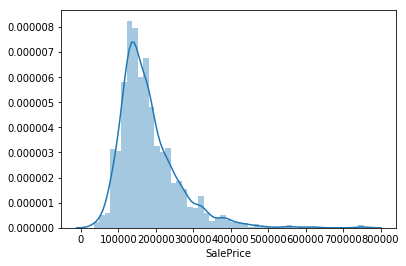

In [29]:
sns.distplot(house[response_var])

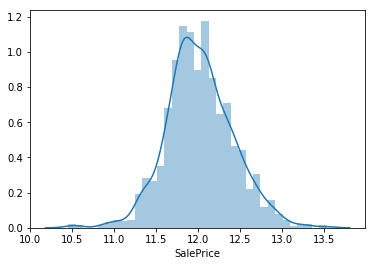

In [30]:
house[response_var] = np.log1p(house[response_var])
sns.distplot(house[response_var])

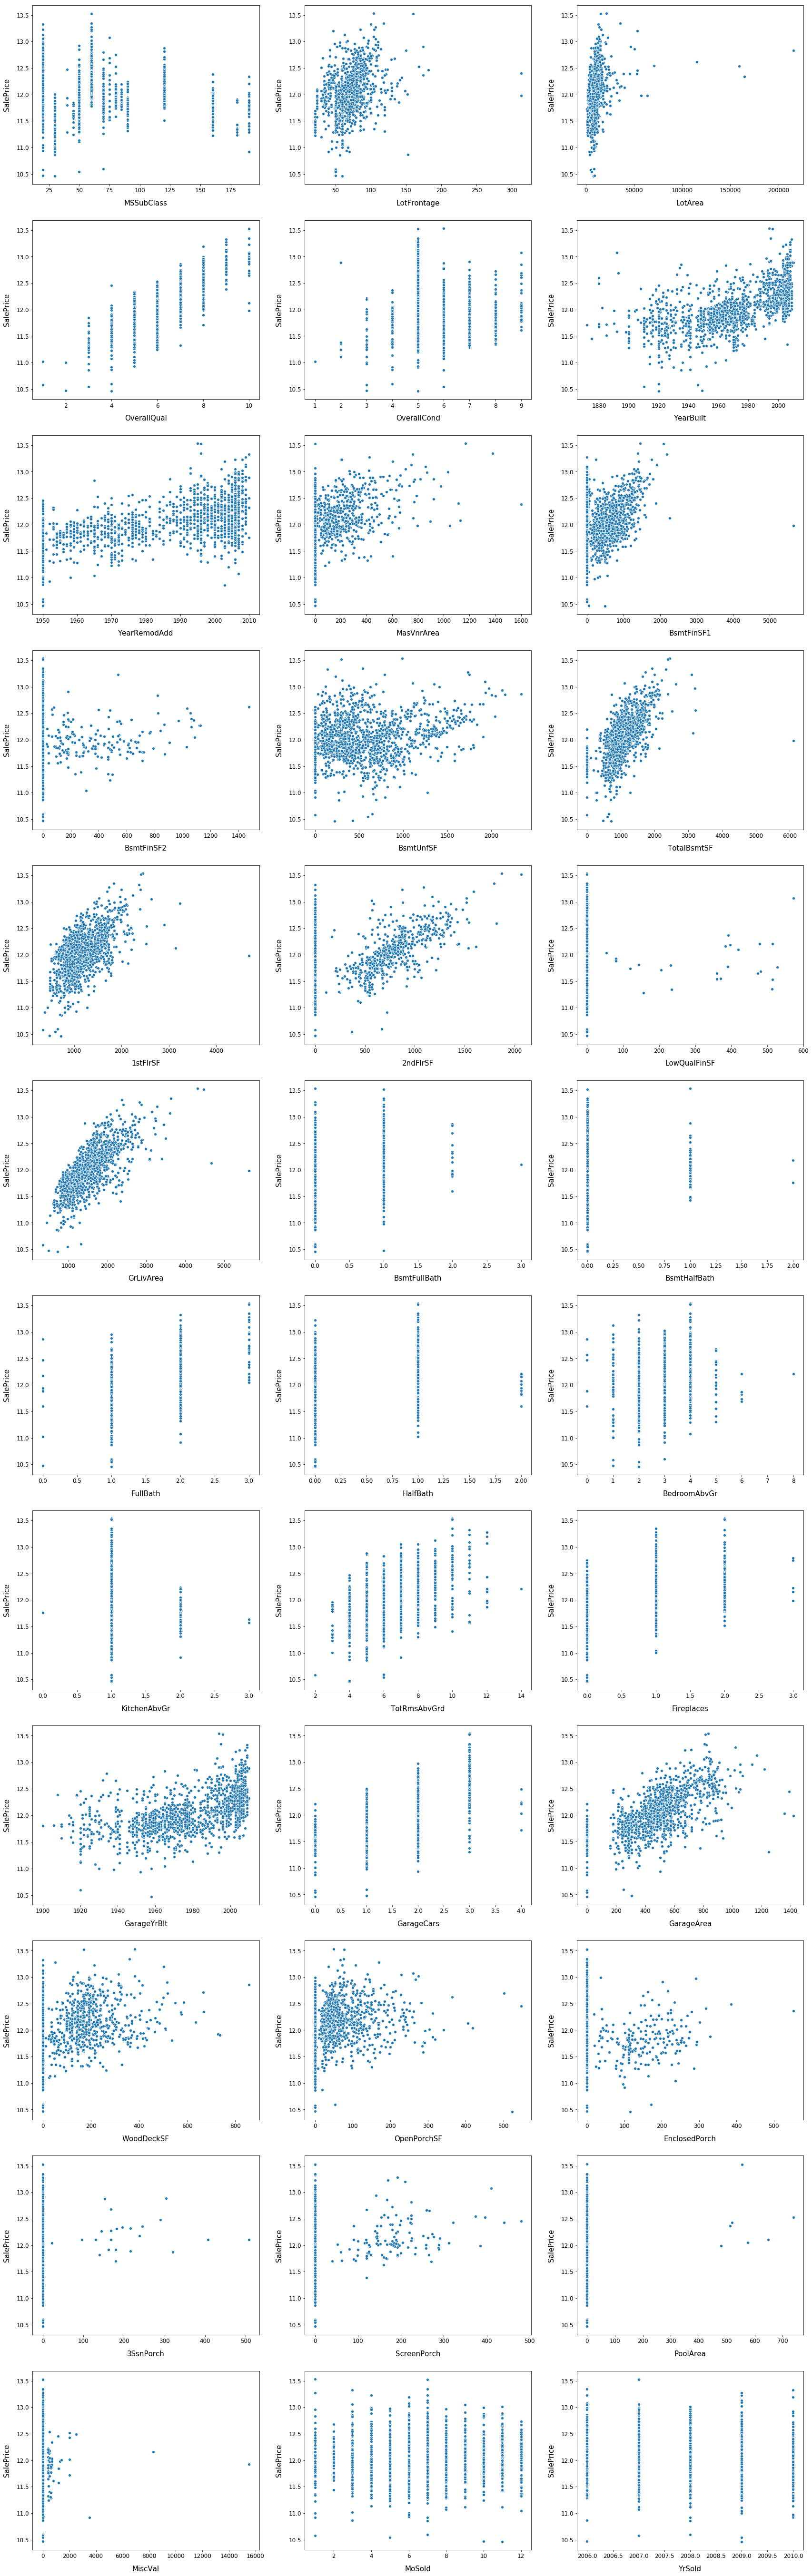

In [31]:
# Define a figure and axes with a defined size and defining that we need to do subplots
fig, axs = plt.subplots(ncols=0, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
# Iterate through the numeric columns from the data frame house
for i, feature in enumerate(list(house[num_vars]), 1):
    # Define the location for the plot of each variable using 3 coordinates location
    # 3 coordinates: number of rows, number of columns, location of the plot on the grid
    plt.subplot(len(list(num_vars)), 3, i)
    # do the actual plot for the given feature
    sns.scatterplot(x=feature, y=response_var, data=house)
    # y and x labels    
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
        
plt.show()

In [32]:
print('data frame dimensions before removing outliers is {}'.format(house.shape))
house = house[house['LotFrontage'] <= 150]
house = house[house['LotArea'] <= 20000]
house = house[house['MasVnrArea']<= 1000]
house = house[house['BsmtFinSF1']<= 3000]
house = house[house['BsmtFinSF2']<= 1200]
house = house[house['TotalBsmtSF']<= 4000]
house = house[house['1stFlrSF'] <= 3000]
house = house[house['2ndFlrSF']<= 1750]
house = house[house['GrLivArea']<= 4000]
house = house[house['BedroomAbvGr'] <= 7]
house = house[house['TotRmsAbvGrd'] <= 12]
house = house[house['GarageArea'] <= 1200]
house = house[house['WoodDeckSF']<= 750]
house = house[house['OpenPorchSF'] <= 400]
house = house[house['EnclosedPorch'] <= 500]
print('data frame dimensions after removing outliers is {}'.format(house.shape))

data frame dimensions before removing outliers is (1460, 81)
data frame dimensions after removing outliers is (1142, 81)


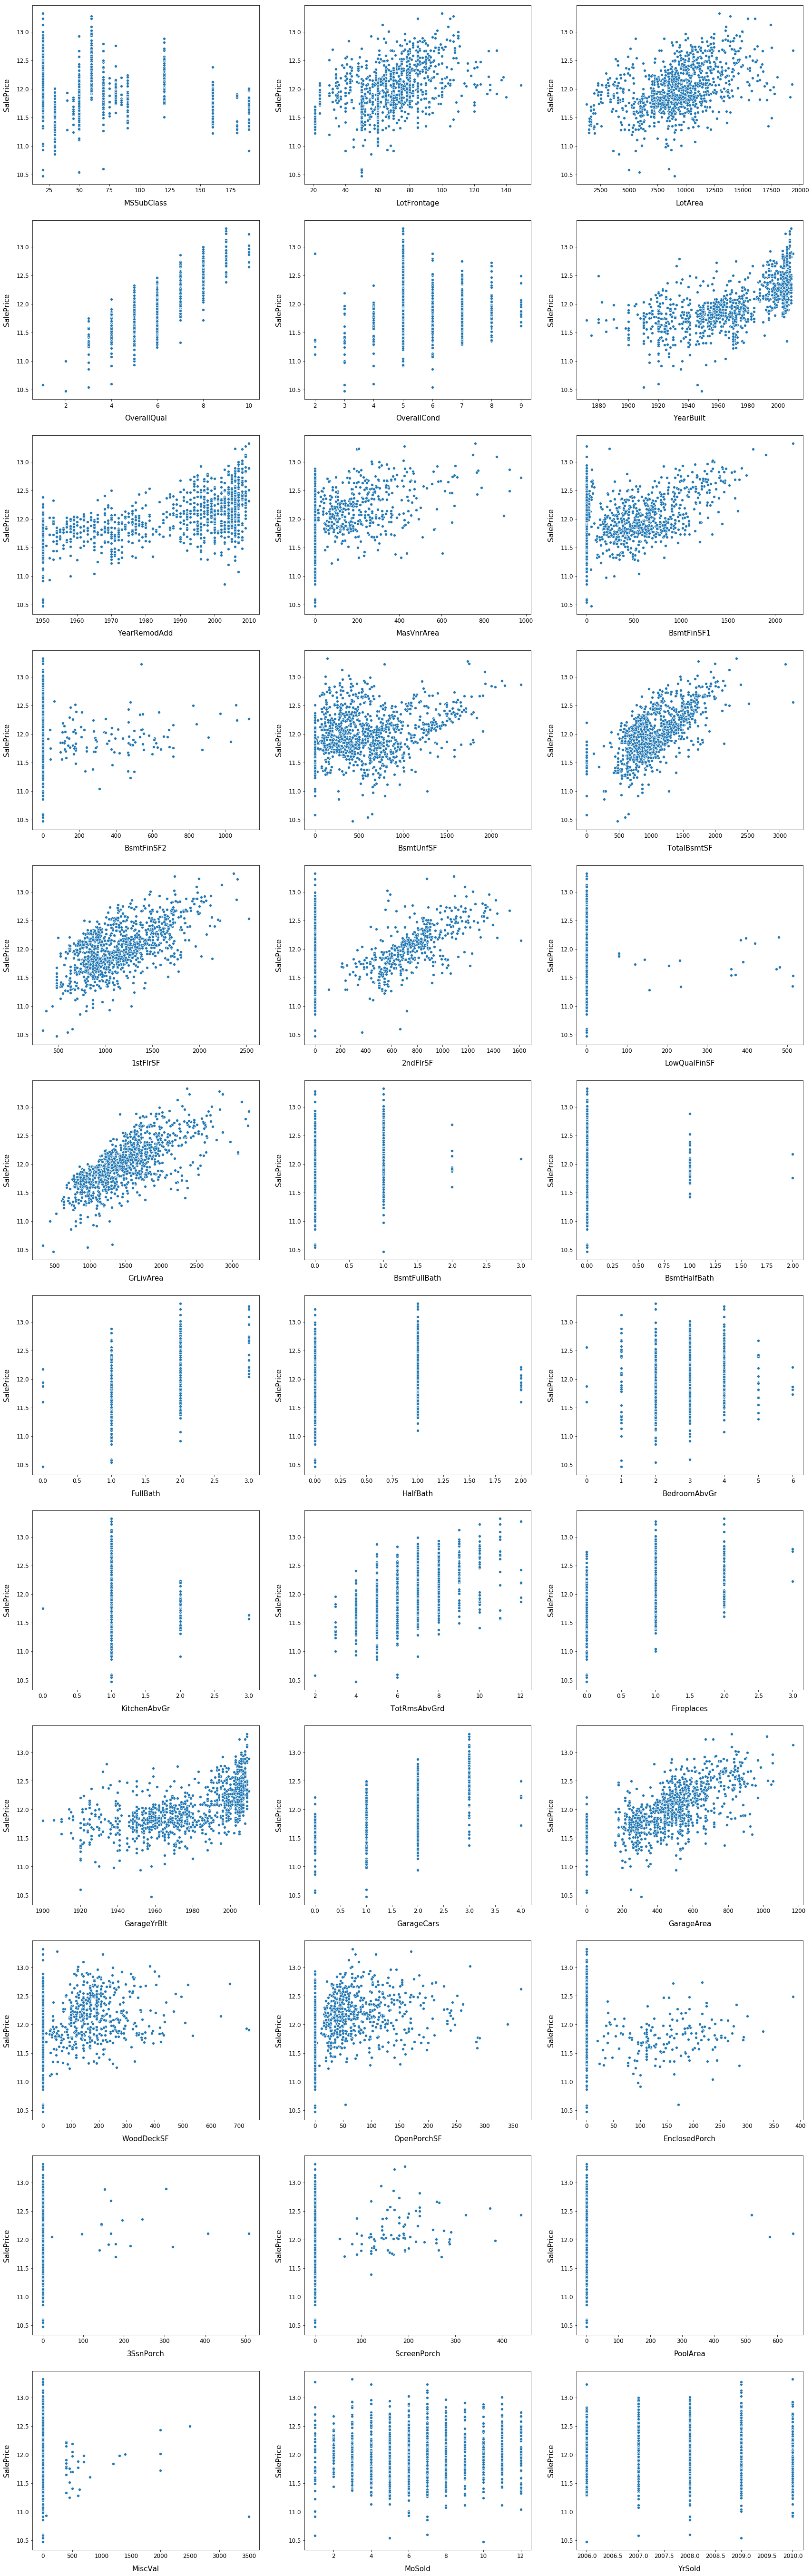

In [33]:
# Define a figure and axes with a defined size and defining that we need to do subplots
fig, axs = plt.subplots(ncols=0, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
# Iterate through the numeric columns from the data frame house
for i, feature in enumerate(list(house[num_vars]), 1):
    # Define the location for the plot of each variable using 3 coordinates location
    # 3 coordinates: number of rows, number of columns, location of the plot on the grid
    plt.subplot(len(list(num_vars)), 3, i)
    # do the actual plot for the given feature
    sns.scatterplot(x=feature, y=response_var, data=house)
    # y and x labels    
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
        
plt.show()

In [34]:
remove_vars = ['BsmtFinSF2','LowQualFinSF','PoolArea','ScreenPorch','3SsnPorch','MiscVal']
num_vars = [item for item in num_vars if item not in remove_vars]
print(num_vars)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold']


In [35]:
missing_dict = {}
for var in house.columns:
    percent_missing = (house[var].isnull().sum()/ house.shape[0]) * 100
    if percent_missing > 0:
        missing_dict[var] = percent_missing
        print('variable: {} , missing_values: {}'.format(var, percent_missing))

variable: Alley , missing_values: 92.99474605954467
variable: BsmtQual , missing_values: 2.626970227670753
variable: BsmtCond , missing_values: 2.626970227670753
variable: BsmtExposure , missing_values: 2.714535901926445
variable: BsmtFinType1 , missing_values: 2.626970227670753
variable: BsmtFinType2 , missing_values: 2.714535901926445
variable: Electrical , missing_values: 0.08756567425569177
variable: FireplaceQu , missing_values: 51.40105078809106
variable: GarageType , missing_values: 6.217162872154115
variable: GarageYrBlt , missing_values: 6.217162872154115
variable: GarageFinish , missing_values: 6.217162872154115
variable: GarageQual , missing_values: 6.217162872154115
variable: GarageCond , missing_values: 6.217162872154115
variable: PoolQC , missing_values: 99.73730297723293
variable: Fence , missing_values: 80.8231173380035
variable: MiscFeature , missing_values: 96.7600700525394


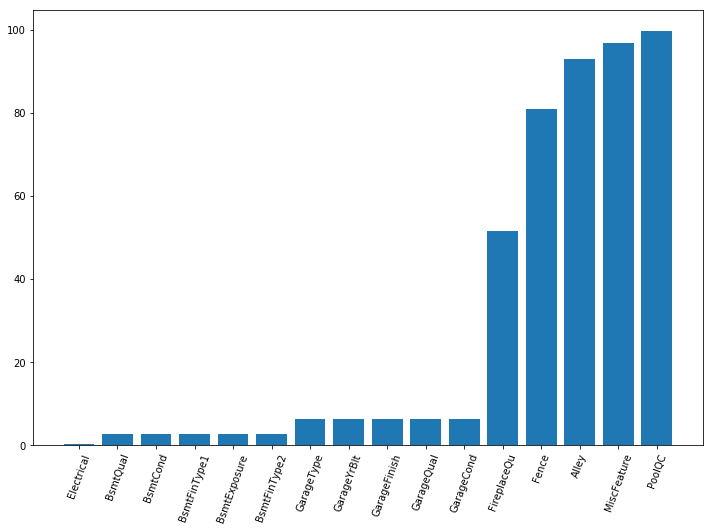

In [36]:
# Sort the dictionary for smallest to biggest value
missing_dict = {k: v for k, v in sorted(missing_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(12,8))
plt.bar(range(len(missing_dict)), list(missing_dict.values()), align='center')
plt.xticks(range(len(missing_dict)), list(missing_dict.keys()), rotation = 70)
plt.show()

In [37]:
 # Data description states that missing values for the garage represents a no garage (we replace them with None)
for var in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    house[var] = house[var].fillna('None')

house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)
# Data description states that missing values for the basement represents a no basement (we replace them with None)
for var in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    house[var] = house[var].fillna('None')

# Other variables that indicate a doesn't exist if missing that we can replace with None
for var in ('PoolQC', 'Alley','Fence','FireplaceQu', 'Electrical'):
    house[var] = house[var].fillna('None')
# Other variables:
# MiscFeature is a variable to add further information that were not covered by other categories. So, let's just get rid of that
# Garage
cat_vars.remove('MiscFeature')

In [38]:
for var in house.columns:
    percent_missing = (house[var].isnull().sum()/ house.shape[0]) * 100
    if percent_missing > 0:
        print('variable: {} , missing_values: {}'.format(var, percent_missing))

variable: MiscFeature , missing_values: 96.7600700525394


In [39]:
house_num = house[num_vars]
house_num.index = house.index

house_cat = house[cat_vars]
house_cat.index = house.index

house_y = house[response_var]

In [40]:
print(num_vars)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold']


In [41]:
house_num['HasWoodDeck'] = (house_num['WoodDeckSF'] == 0) * 1
house_num['HasOpenPorch'] = (house_num['OpenPorchSF'] == 0) * 1
house_num['HasEnclosedPorch'] = (house_num['EnclosedPorch'] == 0) * 1

house_num['Total_Home_Quality'] = house_num['OverallQual'] + house_num['OverallCond']
house_num['TotalSF'] = house_num['TotalBsmtSF'] + house_num['1stFlrSF'] + house_num['2ndFlrSF']
house_num['Total_sqr_footage'] = (house_num['BsmtFinSF1']  + house_num['1stFlrSF'] + house_num['2ndFlrSF'])
house_num['Total_Bathrooms'] = (house_num['FullBath'] + (0.5 * house_num['HalfBath']) +
                               house_num['BsmtFullBath'] + (0.5 * house_num['BsmtHalfBath']))


house_num['TotalBsmtSF'] = house_num['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
house_num['2ndFlrSF'] = house_num['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
house_num['GarageArea'] = house_num['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
house_num['GarageCars'] = house_num['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
house_num['LotFrontage'] = house_num['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
house_num['MasVnrArea'] = house_num['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
house_num['BsmtFinSF1'] = house_num['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

house_num['has2ndfloor'] = house_num['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
house_num['hasgarage'] = house_num['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
house_num['hasbsmt'] = house_num['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
house_num['hasfireplace'] = house_num['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [42]:
print(cat_vars)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']


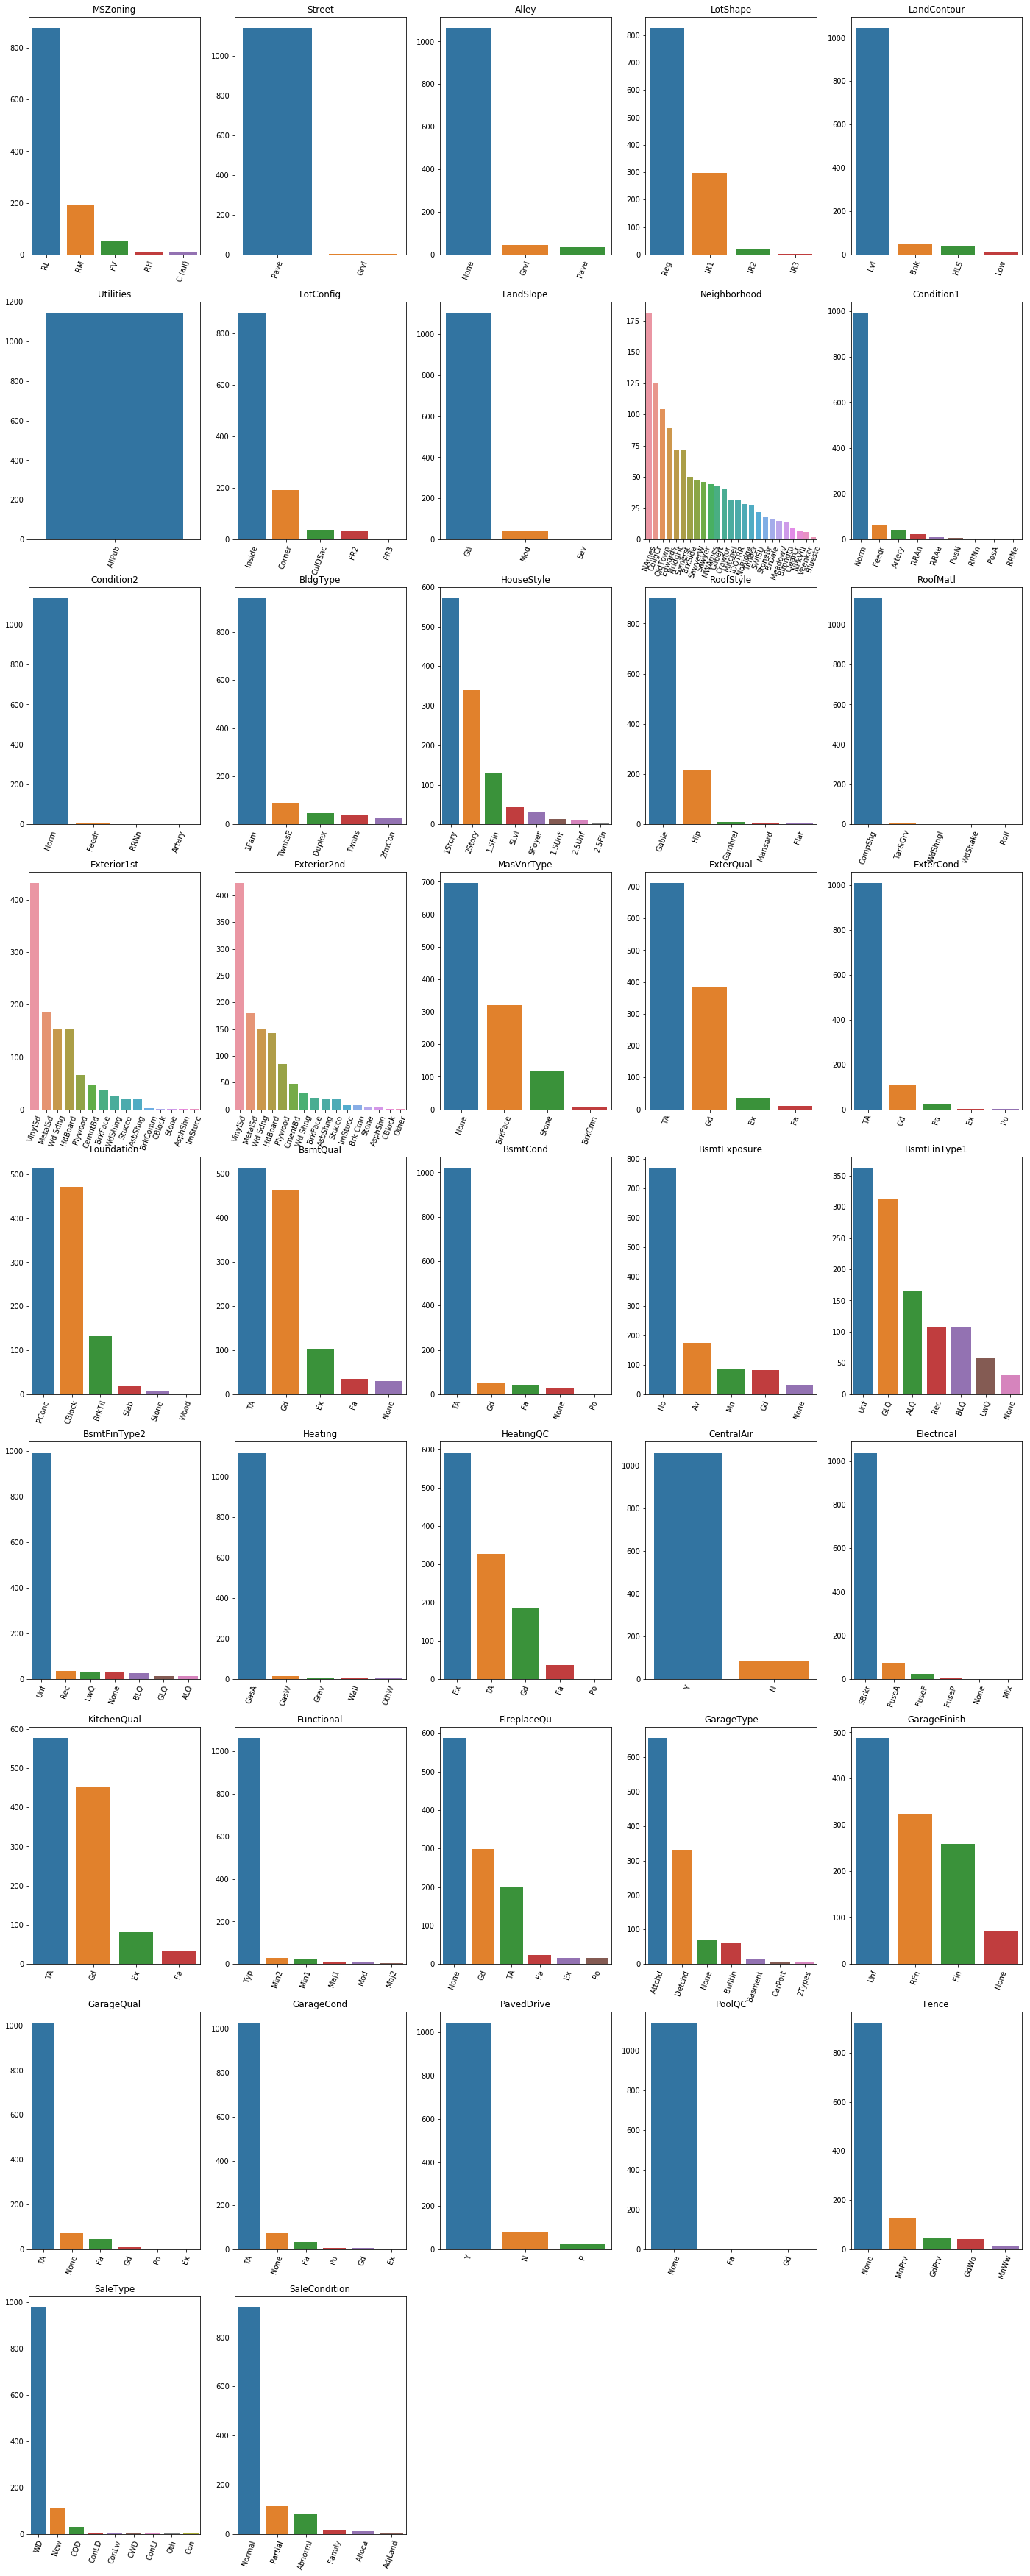

In [43]:
# Define a figure and axes with a defined size and defining that we need to do subplots
fig, axs = plt.subplots(ncols=0, nrows=0, figsize=(10, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
# Iterate through the numeric columns from the data frame house
for i, var in enumerate(list(house_cat[cat_vars]), 1):
    # Define the location for the plot of each variable using 3 coordinates location
    # 3 coordinates: number of rows, number of columns, location of the plot on the grid
    plt.subplot(len(list(cat_vars)), 5, i)
    value_counts = house_cat[var].value_counts()
    df_counts = value_counts.rename_axis('unique_values').reset_index(name='counts')
    # do the actual plot for the given feature
    sns.barplot(x='unique_values',y = 'counts', data=df_counts)
    # y and x labels    
    plt.title('{}'.format(var), size=12)
    plt.xlabel('')    
    plt.ylabel('')
    plt.xticks(rotation=70)       
plt.show()

In [44]:
house_cat.shape

(1142, 42)

In [45]:
house_cat = pd.get_dummies(house_cat)

In [46]:
house_cat.shape

(1142, 250)

In [47]:
house_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,Sa

In [48]:
house_x = pd.concat([house_cat, house_num], axis = 1 )

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_x, house_y, test_size = 0.2, random_state = 0)

In [66]:
# ML Code starts 
## Setup cross validation folds 
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

## Define error metrics 
def rmse(y_actual, y_pred):
    return np.sqrt(mean_squared_error(y_actual, y_pred))

def cv_rmse(model, X , Y):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring = "neg_mean_squared_error", cv = kf))
    return rmse

In [67]:
# Setup all models
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                         n_estimators=6000,
                         max_depth=4,
                         min_child_weight=0,
                         gamma=0.6,
                         subsample=0.7,
                         colsample_bytree=0.7,
                         objective='reg:squarederror',
                         nthread=-1,
                         scale_pos_weight=1,
                         seed=27,
                         reg_alpha=0.00006,
                         random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [68]:
models = []
models.append(('lightgbm', lightgbm))
models.append(('xgboost', xgboost))
models.append(('ridge',ridge))
models.append(('svr', svr))
models.append(('gbr', gbr))
models.append(('rf', rf))
models.append(('stack_gen', stack_gen))

In [69]:
# Fit the models 
print('stack_gen')
stack_gen_model_fit = stack_gen.fit(np.array(X_train), np.array(y_train))

print('lightgbm')
lgb_model_fit = lightgbm.fit(X_train, y_train)

print('Svr')
svr_model_fit = svr.fit(X_train, y_train)

print('Ridge')
ridge_model_fit = ridge.fit(X_train, y_train)

print('RandomForest')
rf_model_fit = rf.fit(X_train, y_train)

print('GradientBoosting')
gbr_model_fit = gbr.fit(X_train, y_train)

print('XBoost')
xgb_model_fit = xgboost.fit(X_train, y_train)

stack_gen
lightgbm
Svr
Ridge
RandomForest
GradientBoosting
XBoost


In [70]:
## Make prediction on the training data for each model
y_train_stack = stack_gen_model_fit.predict(X_train)
y_train_lgb = lgb_model_fit.predict(X_train)
y_train_svr = svr_model_fit.predict(X_train)
y_train_ridge = ridge_model_fit.predict(X_train)
y_train_rf = rf_model_fit.predict(X_train)
y_train_gbr = gbr_model_fit.predict(X_train)
y_train_xgb = xgb_model_fit.predict(X_train)

## Make prediction on the test data for each model
y_test_stack = stack_gen_model_fit.predict(X_test)
y_test_lgb = lgb_model_fit.predict(X_test)
y_test_svr = svr_model_fit.predict(X_test)
y_test_ridge = ridge_model_fit.predict(X_test)
y_test_rf = rf_model_fit.predict(X_test)
y_test_gbr = gbr_model_fit.predict(X_test)
y_test_xgb = xgb_model_fit.predict(X_test)

In [73]:
test_scores = {}
test_scores['stack'] = rmse(y_test, y_test_stack)
test_scores['lgb'] = rmse(y_test, y_test_lgb)
test_scores['svr'] = rmse(y_test, y_test_svr)
test_scores['ridge'] = rmse(y_test, y_test_ridge)
test_scores['rf'] = rmse(y_test, y_test_rf)
test_scores['gbr'] = rmse(y_test, y_test_gbr)
test_scores['xgb'] = rmse(y_test, y_test_xgb)

In [74]:
train_scores = {}
train_scores['stack'] = rmse(y_train, y_train_stack)
train_scores['lgb'] = rmse(y_train, y_train_lgb)
train_scores['svr'] = rmse(y_train, y_train_svr)
train_scores['ridge'] = rmse(y_train, y_train_ridge)
train_scores['rf'] = rmse(y_train, y_train_rf)
train_scores['gbr'] = rmse(y_train, y_train_gbr)
train_scores['xgb'] = rmse(y_train, y_train_xgb)

lightgbm: 0.119264 (0.015353)
xgboost: 0.139488 (0.019756)
ridge: 0.114776 (0.018953)
svr: 0.121512 (0.020862)
gbr: 0.113664 (0.018863)
rf: 0.137673 (0.016794)
stack_gen: 0.120384 (0.017648)


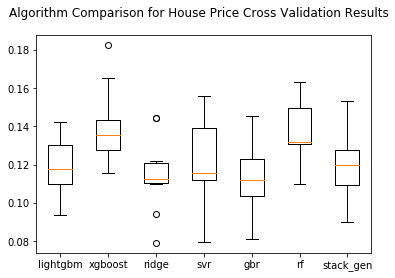

In [76]:
## Calculate and plot the cross validation error rate
cv_results = []
cv_names = []
for name, model in models:
    cv_scores = cv_rmse(model = model, X = X_train, Y = y_train)
    cv_results.append(cv_scores)
    cv_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_scores.mean(), cv_scores.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison for House Price Cross Validation Results')
ax = fig.add_subplot(111)
plt.boxplot(cv_results)
ax.set_xticklabels(cv_names)
plt.show()

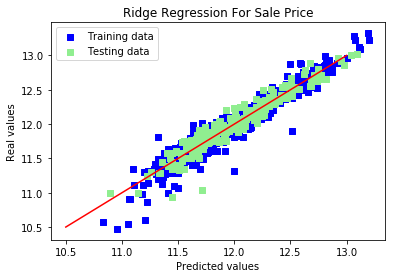

In [80]:
plt.scatter(y_train_ridge, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ridge, y_test, c = "lightgreen", marker = "s", label = "Testing data")
plt.title("Ridge Regression For Sale Price")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13], [10.5, 13], c = "red")
plt.show()

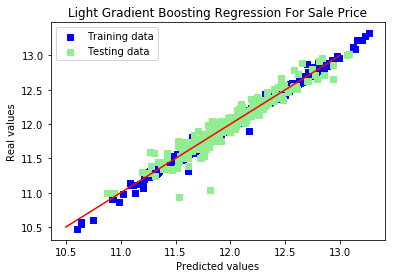

In [82]:
plt.scatter(y_train_lgb, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_lgb, y_test, c = "lightgreen", marker = "s", label = "Testing data")
plt.title("Light Gradient Boosting Regression For Sale Price")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13], [10.5, 13], c = "red")
plt.show()